## COMPUTER PROGRAMMING (PE 262)

### 2933320


## ALGORITHM

## Sutton's Correlation

1. Calculate the critical temperature and critical pressure of the C7+ using Riazi and Daubert correlation



2. Calculate the Apparent Molecular weight by multiplying mole fraction by Molecular Weight.




3. Calculate the parameters J and K (the Stewart–Burkhardt–Voo correlating parameters for the gas stream)




4. Calculate the adjustment parameters, FJ, EJ, and EK because you will need FJ to calculate EJ.




5. Adjust the parameters J and K using the adjust parameters (FJ,EJ,EK) which was calculated in step 4.




6. Calculate the corrected pseudo-critical pressure and temperature



7. Calculate the reduced properties for both pressure and temperature.



8. Obtain Z from the Standing and Katz chart.



9. Calculate density after obtaining Z.



## For uncorrected pseudocritical properties 



1. Calculate the specific gravity of the gas.





2. Use Standing's correlation to calculate Tpc and Ppc




3. Compute pseudo-reduced temperature and pressure




4. Obtain Z from Standing and Katz Chart



5. Calculate density




6. Estimate percentage error 




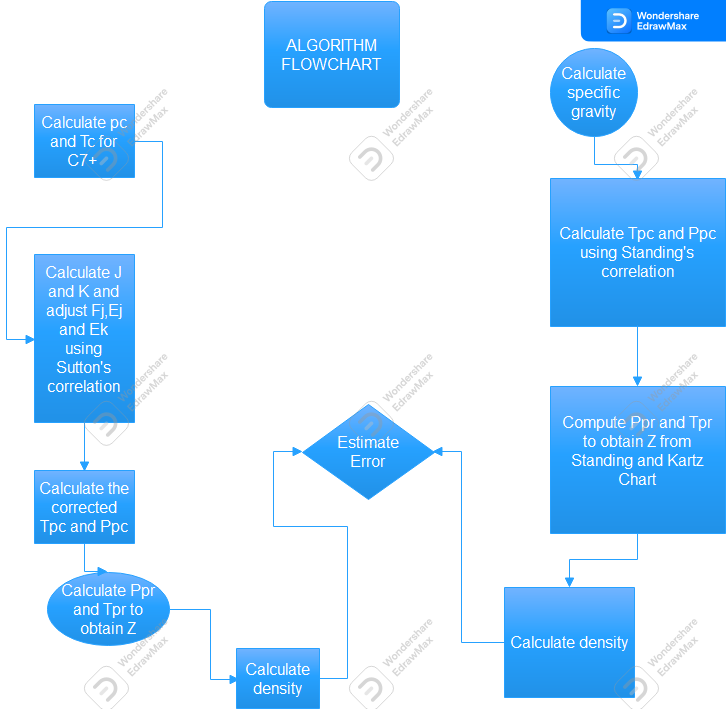

In [1]:
import numpy as np
# Defining parameters for Tc of C7+
a = 544.4
b = 0.2998
c= 1.0555
d = -1.3478e-4
e = -0.61641
f = 0.0
M = 161
sg = 0.81

Tc = a*M**b*sg**c*np.exp(d*M + e*sg +f*M*sg)
print(Tc)

1187.5902949206484


In [2]:
# Defining parameters for Pc of C7+
a = 4.5203e4
b = -0.8063
c= 1.6015
d = -1.8078e-3
e = -0.3084
f = 0.0
M = 161
sg = 0.81

Pc = a*M**b*sg**c*np.exp(d*M + e*sg +f*M*sg)
print(Pc)

312.14033057074306


In [19]:
#Defining the mole fractions,Critical T&P and Molecular Weight
yi_=np.array([0.83,0.06,0.03,0.02,0.02,0.01,0.03]) # Set of data for the mole fraction for the gas stream
Tci_=np.array([343.33,549.92,666.06,765.62,845.60,923.00,1162.92]) #Critical temperatures for C1-C7+ respectively
Pci_=np.array([666.4,706.5,616.0,550.6,488.6,436.9,223.79]) # Critical pressures for C1-C7+ respectively
Maw = np.array([16.0,30.1,44.1,58.1,72.2,84.0,161])

w=0
x=0
y=0
z=0
index = 0
for b in yi_:
    TJ1 = b*(Tci_[index]/Pci_[index]) # the expression represents the 1st term in the J formula
    TJ2 = b*((Tci_[index]/Pci_[index])**0.5) # the expression represents the 2nd term in the J formula
    TK = b*(Tci_[index]/Pci_[index]**0.5) # the expression represents the K formula
    AMW = b*(Maw[index]) # Apparent Molecular Weight
    w += TJ1 
    x += TJ2
    y += TK
    z += AMW
    index+=1
print(w)
print(x)

J=(1/3)*w+(2/3)*x**2
Maw = z
print('J is',J)
print('TK is',y)
print('Apparent Molecular Weight is ' ,z)


0.7462012694799496
0.8127009012285281
J is 0.689055593065091
TK is 17.276620991168024
Apparent Molecular Weight is  24.684999999999995


In [22]:
def F_j(y): #Function for Fj
    return 1/3*(y*(Tc/Pc))+ 2/3*(y*(Tc/Pc)**(0.5))**2 #formula for Fj
Fj = F_j(0.03)
print('Fj is',Fj)

def E_j(y,Fj):
    return 0.6081*Fj+1.1325*Fj**2-14.004*Fj*y+64.434*Fj*y**2
Ej = E_j(0.03,Fj)
print('Ej is',Ej)

def E_k(y,M):
    return (Tc/Pc**0.5)*((0.3129*y)-(4.8156*(y**2))+(27.3751*(y**3)))
Ek= E_k(0.03,161)
print('Ek is',Ek)

Fj is 0.040329479702738515
Ej is 0.011761840121898914
Ek is 0.38933802895103053


In [24]:
def J_prime(J,Ej):
    return J-Ej
Jprime=J_prime(J,Ej)
print('J prime is ',Jprime)

def K_prime(y,Ek):
    return y-Ek
Kprime = K_prime(y,Ek)
print('K prime is',Kprime)

J prime is  0.677293752943192
K prime is 16.887282962216993


In [26]:
def Tpc_f(Kprime,Jprime):
    return (Kprime**2)/Jprime
Tpc_prime =Tpc_f(Kprime,Jprime)
print('Tpc prime is',Tpc_prime)

def Ppc_f(Tpc_prime ,Jprime):
    return Tpc_prime/Jprime
Ppc_prime = Ppc_f(Tpc_prime ,Jprime)
print('Ppc prime is',Ppc_prime)

Tpc prime is 421.05855045425733
Ppc prime is 621.6778888400195


In [27]:
def Ppr1(P,Ppc_prime):
    return P/Ppc_prime
Ppr = Ppr1(2000,Ppc_prime)
print('Pseudo reduced pressure is',Ppr)

def Tpr1(T,Tpc_prime):
    return T/Tpc_prime
Tpr =Tpr1(610,Tpc_prime)
print('Pseudo reduced temperature is',Tpr)

Pseudo reduced pressure is 3.21710010264604
Pseudo reduced temperature is 1.4487296347310936


In [29]:
Z = 0.75 #compressibility factor
P = 2000 #2000 psia
T = 610  #degree rankine
R = 10.73
rho = (P*Maw)/(Z*R*T)
print('Density of the gas is ' ,(rho),'lb/ft3')


Density of the gas is  10.057089310905026 lb/ft3


## Density without adjusting the pseudo critical properties

In [31]:
#Calculate specific gravity of the gas
#Maw is the apparent molecuar weight of the gas stream
MWair = 28.96
SG = (Maw)/(MWair)
print(SG)

0.8523825966850826


   ## Using Standings Correlation,Calculate the pseudo-critical properties.

In [33]:
Tpc = 168 + 325*SG - 12.5*SG**2
Ppc = 677 + 15*SG -  37.5*SG**2
print ("Tpc is ",Tpc,"oR")
print ("Ppc is  ",Ppc,'psia')

Tpc is  435.94239278350676 oR
Ppc is   662.5398855328411 psia


In [34]:
Tpr_2= T/Tpc

Ppr_2 = P/Ppc
print('The pseudo-reduced temperature for  ', Tpr_2)
print('The pseudo-reduced pressure is' , Ppr_2)

The pseudo-reduced temperature for   1.3992674493185433
The pseudo-reduced pressure is 3.0186861858007537


In [35]:
Z = 0.71
rho_u = (P*Maw)/(Z*R*T)
print('desnity is ',rho_u,'lb/ft3')

desnity is  10.623685891801083 lb/ft3


### Estimating The Error

In [37]:
error_g = (rho_u - rho)/(rho_u)
print("error is ", error_g)

#expressed as a percentage
percentage_error = error_g*100
print('The error in percentage is ', round(percentage_error) ,"%")

error is  0.053333333333333274
The error in percentage is  5 %
